In [4]:
import torch

In [5]:
cuda = torch.device("cuda:0")

In [6]:
def f(x, theta):
    return x+theta

In [51]:
mean = 1.
std = 1.
mb = 1024

X_0 = torch.normal(mean, std, size=(mb,))
theta_0 = torch.tensor([1.], requires_grad=True)

In [33]:
def compute_Lt(x0, T, theta):
    for _ in range(T):
        x_t = f(x0, theta)
    return torch.mean((x_t-1)**2)


Compute the derivate of Lt with respect to theta

In [34]:
T=20
Lt = compute_Lt(X_0, T, theta_0)

T=20, theta=1 what is the loss Lt and its gradient 

In [35]:
Lt.backward()
print(theta_0.grad)

Descent algorithm

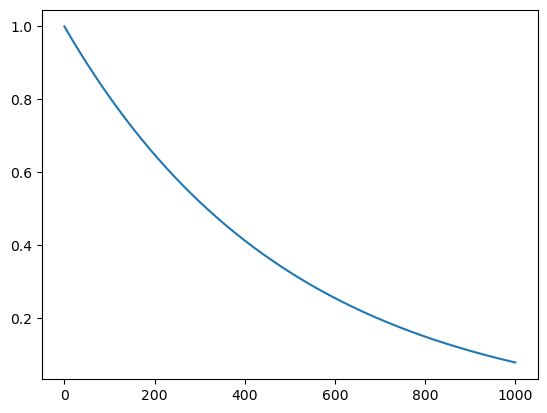

In [46]:
import matplotlib.pyplot as plt
T = 20
theta = theta_0.clone().detach().requires_grad_(True)
nb_epoch = 1000
learning_rate_20 = 1e-3
liste_theta = [theta.detach().numpy()]
for _ in range(nb_epoch):
    Lt = compute_Lt(X_0, T, theta)
    Lt.backward()
    with torch.no_grad():
        theta = theta - learning_rate_20*theta.grad
        theta.requires_grad_(True)
    liste_theta.append(theta.detach().numpy().item())
# Affichage de l'évolution de theta
plt.plot(liste_theta)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


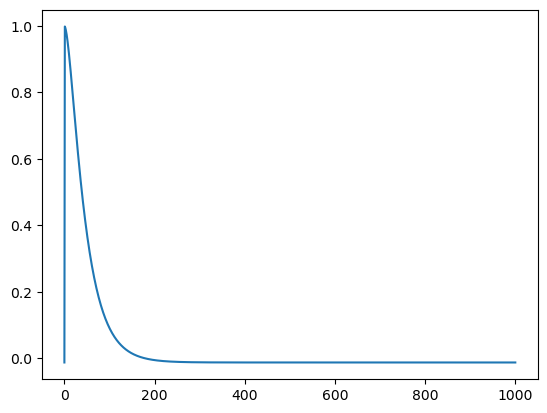

In [55]:
T = 20
theta = theta_0.clone().detach().requires_grad_(True)
nb_epoch = 1000
optim =  torch.optim.SGD([theta], lr=0.001, momentum=0.9)
liste_theta = [theta.detach().numpy()]
for _ in range(nb_epoch):
    optim.zero_grad()
    Lt = compute_Lt(X_0, T, theta)
    Lt.backward()
    optim.step()
    liste_theta.append(theta.detach().numpy().item())
# Affichage de l'évolution de theta
plt.plot(liste_theta)
plt.show()

T=200

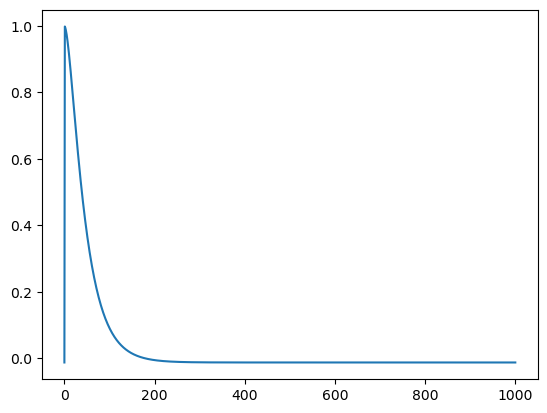

In [56]:
T = 200
theta = theta_0.clone().detach().requires_grad_(True)
nb_epoch = 1000
optim =  torch.optim.SGD([theta], lr=0.001, momentum=0.9)
liste_theta = [theta.detach().numpy()]
for _ in range(nb_epoch):
    optim.zero_grad()
    Lt = compute_Lt(X_0, T, theta)
    Lt.backward()
    optim.step()
    liste_theta.append(theta.detach().numpy().item())
# Affichage de l'évolution de theta
plt.plot(liste_theta)
plt.show()

Learning rate optimal 

Le learning rate doit être de l'ordre de $\frac{1}{H}$ où $H$ est la Hessienne.  
$L_T = \mathbb{E}_{x_0 \sim p}(x_T - 1)^2$  
Or $x_T = x_0 + T \times \theta$  
Donc $L_T = \mathbb{E}_{x_0 \sim p}(x_0 + T \times \theta - 1)^2$  

D'où $\frac{\partial L_T}{\partial \theta} = \frac{\partial \mathbb E [(x_0 + T \times \theta - 1)^2]}{\partial \theta} = \mathbb E [2 T (x_0 + T \times \theta - 1)] = 2 T \mathbb E[x_0] + 2 T^2 \theta - 2 T = 2 T^2 \theta~~~$ car $\mathbb E[x_0] = 1$  

Donc $H = \frac{\partial^2 L_T}{\partial \theta^2} = 2 T^2$

Donc pour $T = 20$, $\theta_{optimal} = \frac{1}{2 * 20^2} = \frac{1}{400} = 0.0025 \approx 1e-3$  
Et pour $T = 200$, $\theta_{optimal} = \frac{1}{2 * 200^2} = \frac{1}{40000} = 0.000025 \approx 1e-5$

In [60]:
import torchviz
T = 3
theta = theta_0.clone().detach().requires_grad_(True)
nb_epoch = 1000
optim =  torch.optim.SGD([theta], lr=1/(2*T**2), momentum=0.9)
liste_theta = [theta.detach().numpy()]
for _ in range(nb_epoch):
    optim.zero_grad()
    Lt = compute_Lt(X_0, T, theta)
    Lt.backward()
    optim.step()
    liste_theta.append(theta.detach().numpy().item())


# Création du graphique et sauvegarde en .png
viz_3 = torchviz.make_dot(Lt)
viz_3.format = "png"
viz_3.render("L_T_graph")

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH